## Oppgave 6: Varmeligning,  (10 poeng)

Nå skal vi modellere steking av et legeme i en ovn. Vi ser på et tverrsnitt av legemet, slik at vi kun trenger de to koordinatretningene $x$ og $y$, og ikke dybderetningen $z$ for ovnen og legemet. 

Den partielle differensiallikningen er lik
$$
\begin{align}\tag{19}
u_t = \alpha\cdot(u_{xx} + u_{yy}),
\end{align}
$$
hvor $\alpha$ er legemets *termiske diffusivitet*. Passende tall for $\alpha$ kan slås opp på nett.

Vi antar at temperaturen av luft i ovnen holdes konstant på $200$ grader Celsius hele tiden, og bruker altså randbetingelsene at $u(x,y)=200$ på alle kantene av legemet.

Differensialligningen er kun definert for legemet, vi tar ikke med ovnen rundt i denne oppgaven.

Ved tiden $t=0$ (når legemet settes i ovnen) så er temperaturen lik $15$ grader i hele legemet.

### a)

Velg en gjenstand å ta utgangspunkt i, hvor gjendstanden skal ha et rektangulært tverrsnitt. Hvilket materiale har gjenstanden, og hva er den termiske diffusitiviteten $\alpha$?

Bestem deretter hvilke verdier for koordinatene $x$ og $y$ som beskriver gjenstanden.

### b)

Sett opp den partielle differensiallikningen med rand- og initialbetingelser. Løs deretter likningen numerisk.

Legg ved *varmeplot* (altså fargeplot med rødt for varmt og blått for kaldt) for noen ulike tidspunkt.

### c)

Hvor lang tid tar det før temperaturen i midten av legemet når 60 grader? Legg ved et varmeplot for tidspunktet dette skjer.

### d)

Lag en animasjon som viser hvordan temperaturen til legemet endrer seg over tid.

Dere trenger ikke å ta med animasjonen i rapporten, men inkluder kildekode og forklar hva dere observerer.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy.linalg as la


xsize = 100  # cm
ysize = 100  # cm
objectsize = 10  # cm

alpha = 1290  #termisk diffusivitet
m = 100  #punkter x
n = 100  #punkter y
dx = xsize / (m+1)
dy = ysize / (n+1)
dt = 0.0001  #tidssteglengde
steps = 1000 
tid = dt*steps


x = np.linspace(0, xsize, m+2)
y = np.linspace(0, ysize, n+2)

U0 = np.ones((m, n)) * 200  
U0[:, 0] = U0[:, -1] = 200
U0[0, :] = U0[-1, :] = 200
U0[int((xsize/2)-objectsize/2):int((xsize/2)+objectsize/2),int((ysize/2)-objectsize/2):int((ysize/2)+objectsize/2)] = 15

#deriverer for uxx og uyy, og bruker varmeligninga? ok 
def f(u, t):
    u_xx = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / dx**2
    u_yy = (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / dy**2
    return alpha * (u_xx + u_yy)

def euler(U, dt, steps):
    u = np.copy(U)
    for t in range(steps):
        u += dt * f(u, t)
    return u

u_final = euler(U0, dt, steps)

[[200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 ...
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]]
[[200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 ...
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]]
[[200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 ...
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]]
[[200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 ...
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]]
[[200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 20

[[200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 ...
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]]


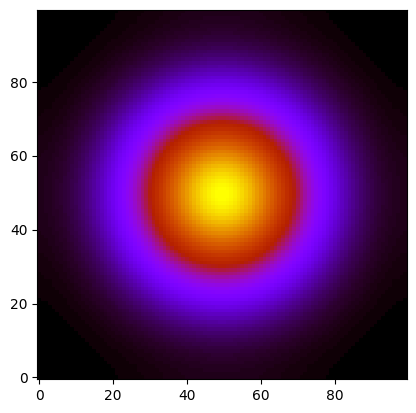

In [46]:
ims = []
fig = plt.figure(clear=True)

for i in range(0, steps, 10): 
    u_step = euler(U0, dt, i)
    ax = fig.gca()
    im = ax.imshow(u_step, cmap='gnuplot_r', animated=True, origin='lower')
    ims.append([im])
    


ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())

In [42]:
#finne ut etter hvor mange tidssteg den er 60 grader? 
i = 0

u_step = euler(U0, dt, 0)

print(tid)

print(u_step[50,50])

while u_step[50,50] < 60.0:
    u_step = euler(U0, dt, i)
    i += 1

print(i,u_step[50,50])
print(i*dt)


0.1
15.0
42 60.36951706808549
0.004200000000000001
